In [1]:
folder = 'C:/Users/alire/OneDrive/data/asmahani_github/ordinal-boost/wine_quality'
filename_red, filename_white = 'winequality-red.csv', 'winequality-white.csv'

import os
import pandas as pd

def load_data(folder, filename):
    csv_path = os.path.join(folder, filename)
    return pd.read_csv(csv_path, sep = ';')

red_wine = load_data(folder, filename_red)
white_wine = load_data(folder, filename_white)

print(f'Shape of red wine: {red_wine.shape}')
print(f'Shape of white wine: {white_wine.shape}')

red_wine.head()
#print(white_wine.head())

Shape of red wine: (1599, 12)
Shape of white wine: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# distribution of quality scores
print(red_wine['quality'].value_counts(sort=False))
print(white_wine['quality'].value_counts(sort=False))

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


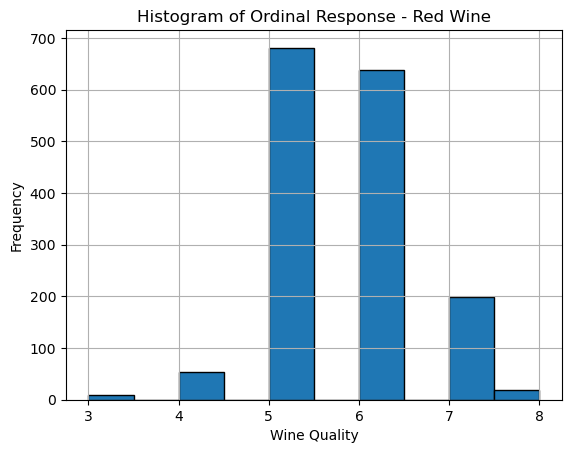

In [3]:
import matplotlib.pyplot as plt

red_wine['quality'].hist(edgecolor = 'black', align = 'mid')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Ordinal Response - Red Wine')

plt.show()

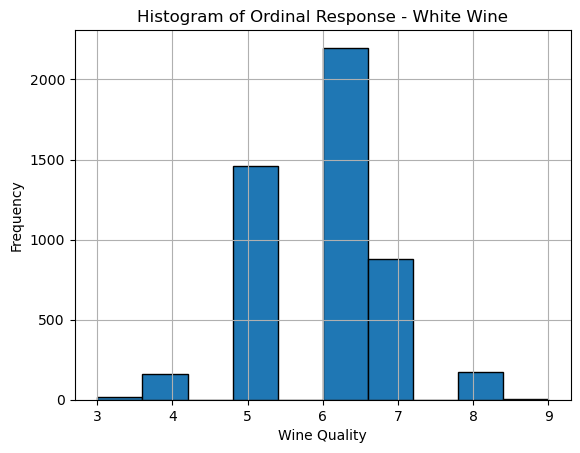

In [4]:
white_wine['quality'].hist(edgecolor = 'black', align = 'mid')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Ordinal Response - White Wine')

plt.show()

In [5]:
red_wine['quality'] = red_wine['quality'] - 3
white_wine['quality'] = white_wine['quality'] - 3

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
X_red, y_red = red_wine.drop(columns = ['quality']).to_numpy(), red_wine['quality'].to_numpy(dtype = 'int')
X_white, y_white = white_wine.drop(columns = ['quality']).to_numpy(), white_wine['quality'].to_numpy(dtype = 'int')

In [8]:
# repeated k-fold cross-validation
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, KFold
#my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,
#    random_state=123)
#my_cv = RepeatedKFold(n_splits=5, n_repeats=2,
#    random_state=123
#)
my_cv = KFold(n_splits=10, shuffle=True, 
              random_state=123
              )
#my_cv = 10

In [9]:
import sys
sys.path.append('C:/Users/alire/Documents/rd/asmahani_github/ordinal-boost/gbor')

#my_scoring = 'neg_root_mean_squared_error'
my_scoring = 'neg_mean_absolute_error'
#my_scoring = 'accuracy'

from sklearn.tree import DecisionTreeRegressor
from gbor.main import BoostedOrdinal
from sklearn.neighbors import KNeighborsRegressor
gbor = BoostedOrdinal(
    #lr_g=1e-1, max_iter=100, validation_fraction=0.2,
    #base_learner=DecisionTreeRegressor(max_depth=3),
    #base_learner=KNeighborsRegressor(n_neighbors=20),
    )
scores_gbor_red = cross_val_score(
    gbor, X_red, y_red, cv = my_cv, 
    scoring = my_scoring
)
scores_gbor_red.mean()

-0.4108805031446541

In [10]:
#gbor.get_params()

In [11]:
gbor = BoostedOrdinal(
    #lr_g=1e-1, max_iter=100, validation_fraction=0.2,
    #base_learner=DecisionTreeRegressor(max_depth=3),
    #base_learner=KNeighborsRegressor(n_neighbors=20),
    )
scores_gbor_white = cross_val_score(
    gbor, X_white, y_white, cv = my_cv, 
    scoring = my_scoring
)
scores_gbor_white.mean()

-0.4793844163432245

In [12]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#rfc = RandomForestClassifier()
rfc = GradientBoostingClassifier()
scores_rfc_red = cross_val_score(
    rfc, X_red, y_red, cv = my_cv, 
    scoring = my_scoring
)
scores_rfc_red.mean()

-0.381497641509434

In [13]:
#rfc = RandomForestClassifier()
rfc = GradientBoostingClassifier()
scores_rfc_white = cross_val_score(
    rfc, X_white, y_white, cv = my_cv, 
    scoring = my_scoring
)
scores_rfc_white.mean()

-0.4575380827177497

In [14]:
if False:
    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor()
    scores_rf_reg_red = cross_val_score(rfr, X_red, y_red, cv = my_cv, scoring = my_scoring)
    scores_rf_reg_red.mean()

In [15]:
if False:
    rfr = RandomForestRegressor()
    scores_rf_reg_white = cross_val_score(rfr, X_white, y_white, cv = my_cv, scoring = my_scoring)
    scores_rf_reg_white.mean()